This notebook simulates various filters for incandescent sources, reproducing the plot Figure 2(c) in 
"Accelerating the discovery of multi-layer nanostructures with analytic differentiation 
of the transfer matrix equations" by J. F. Varner, D. Wert, A. Matari, R. Nofal, and J. J. Foley IV.

  Gradient will be taken with respect to all layers! 
  Gradient will be taken with respect to all layers! 
  Gradient will be taken with respect to all layers! 
  Gradient will be taken with respect to all layers! 
  Gradient will be taken with respect to all layers! 
  Gradient will be taken with respect to all layers! 


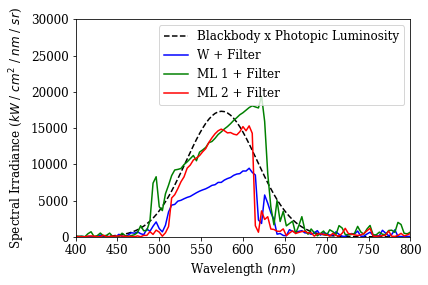

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from wptherml.wpml import multilayer
from wptherml.datalib import datalib
import numpy as np


rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

### speed of light
c = 299792458.
### Just plane W
w_struct = {
                ### will modify layer 2 to be an alloy later, for now it is HfO2
        'Material_List': ['Air', 'W', 'Air'],
        'Thickness_List': [0,  900e-9, 0],
        'Lambda_List': [300e-9, 4000e-9, 1000],
        'Temperature': 2700,
        'LIGHTBULB': 1

        }

### A multi-layer that has strong emissivity in the visible and near IR
### and is made from all temperature stable materials (to ~2000 K)
e_struct = {

        ### will modify layer 2 to be an alloy later, for now it is HfO2
        'Material_List': ['Air', 'Al2O3', 'AlN', 'W', 'Air'],
        'Thickness_List': [0, 60e-9, 90e-9, 900e-9, 0],
        'Lambda_List': [300e-9, 4000e-9, 1000],
        'Temperature': 2700,
        'LIGHTBULB': 1

        }
### A multi-layer that has strong emissivity in the visible only, utilizes
### a theoretical emitter layer defined by a Lorentz oscillator model
l_struct = {
            ### will modify layer 2 to be an alloy later, for now it is HfO2
        'Material_List': ['Air', 'Al2O3', 'AlN', 'SiO2', 'AlN', 'SiO2', 'W', 'Air'],
        'Thickness_List': [0, 31e-9, 85e-9, 125e-9, 174e-9, 173e-9, 900e-9, 0],
        'Lambda_List': [300e-9, 4000e-9, 1000],
        'Temperature': 2700,
        'LIGHTBULB': 1

}

### create instances of the three emitter structures
ml = multilayer(e_struct)
w  = multilayer(w_struct)
lorentz = multilayer(l_struct)

### get photopic luminosity function data
ph = datalib.PhLum(ml.lambda_array)

### Lorentz oscillator parameters
omega_0 = 2*np.pi*c/550e-9
gamma = 2*np.pi*c/7500e-9
omega_p = 2*np.pi*c/1000e-9

### redefine layer 1 of the lorentz instance as a Lorentz oscillator
### using the Lorentz parameters above
lorentz.layer_lorentz(1, omega_p, omega_0, gamma)

### recompute the optical and thermal radiation properties now
### that layer 1 has been redefined
lorentz.fresnel()
lorentz.thermal_emission()

### change layer 2 of ml to be the 17% TiN in AlN alloy
ml.layer_alloy(2, 0.17, 'AlN', 'TiN', 'Bruggeman')
### re-compute emissivity and thermal emission of alloyed structure
ml.fresnel()
ml.thermal_emission()


### Create global variables for emissivity that will NOT change from the original emissivity of W slab
e_emissivity = ml.emissivity_array
w_emissivity = w.emissivity_array
l_emissivity = lorentz.emissivity_array

### define a base structure for the filters that will 
### couple to each of the emitters above
structure = {

        'Material_List' : ['Air', 'Ta2O5','SiO2','Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5','SiO2', 'Ta2O5', 'SiO2', 'Air'],
        ### Thicknesses just chosen arbitrarily, replace with "optimal" values
        'Thickness_List': [0, 18e-9, 47e-9, 156e-9, 212e-9, 178e-9, 23e-9, 51e-9, 224e-9, 150e-9, 205e-9, 258e-9, 187e-9, 243e-9, 190e-9, 266e-9, 215e-9, 153e-9, 227e-9, 154e-9, 226e-9, 152e-9, 245e-9, 24e-9, 229e-9, 263e-9, 190e-9, 257e-9, 200e-9, 260e-9, 224e-9, 27e-9,  229e-9, 154e-9, 219e-9, 274e-9, 198e-9, 405e-9, 211e-9, 166e-9, 233e-9, 47e-9, 66e-9, 17e-9, 125e-9, 153e-9, 237e-9, 151e-9, 225e-9, 147e-9, 193e-9, 127e-9, 214e-9, 135e-9, 173e-9, 112e-9, 165e-9, 130e-9, 223e-9, 130e-9, 163e-9, 112e-9, 164e-9, 114e-9, 167e-9, 121e-9, 378e-9, 114e-9, 160e-9, 113e-9, 174e-9, 117e-9, 211e-9, 23e-9, 221e-9, 261e-9, 399e-9, 266e-9, 390e-9, 28e-9, 18e-9, 367e-9, 198e-9, 302e-9, 28e-9, 33e-9, 426e-9, 31e-9, 15e-9, 222e-9, 96e-9, 0 ],
        'Lambda_List': [300e-9, 4000e-9, 1000],
        'Temperature': 2700,
        'LIGHTBULB': 1

        }

### array of thicknesses optimized for alloy multilayer...
### should give luminous efficiency of 31.26327831119336
x_ml = 1e-9*np.array([ 0, 6.34705002,  57.63445286, 205.266202,   186.34008996, 168.75223438,
  88.84467943,   1.41647209, 273.82056737, 211.95112445, 175.25528534,
 218.93436409, 203.75700791, 254.15556851, 167.96347722, 202.57538687,
 167.76545319, 215.45784589, 320.83441114, 113.18495117, 317.8373776,
 152.93362005, 203.66208037,  71.00503122, 175.64104886, 227.77678837,
 187.84952323, 264.74882891, 201.60763455, 247.47019275, 168.59181315,
  67.58314605, 172.83125853, 208.41783467, 174.56319226, 248.8767587,
 200.38083144, 405.,         207.38367467, 176.35705408, 197.1022933,
  96.05215818,  56.73217441,   3.98265651, 136.79832974, 156.52494589,
 232.91835805, 150.2235543,  227.10318497, 123.36138024, 147.11009192,
 117.99639748, 188.27601634, 114.76816737, 137.21466585, 101.2827927,
 126.00867731, 103.77098746, 160.43171442, 134.42236313, 169.75286999,
 108.84785855, 145.90391034, 129.91162526,  54.11019076, 135.64976564,
 332.83865189, 112.28512408, 142.68284307, 103.01211041, 185.30058404,
 152.76535127, 245.78015839,   1.,         141.66286126, 260.72878064,
 369.81943768, 258.45823816, 370.39068449,  25.19716104,   4.22413505,
 341.87948604, 176.28121086, 365.99051033,   1.,           1.,
 359.00819426,   1.,           1.,         228.50549057,  72.8453217,
0 ])


### array of thicknesses optimized for W... should give a luminous efficiency of
### 39.83655087717496
x_w = np.array([ 0, 8.8959574,   44.05930917, 216.78371357, 161.33900341, 201.81556516,
   1.,          71.74151453, 203.00679181, 200.12590472, 184.25696174,
 229.81259391, 192.88440367, 234.49805481, 174.04032119, 240.76505562,
 217.41048725, 164.56404126, 228.66404885, 160.73764268, 202.51904242,
 152.44634933, 205.18996321,  59.25012634, 204.82071488, 295.44824637,
 185.60052319, 261.51097579, 201.94242104, 253.34461196, 172.76632149,
  72.19142528, 187.17132067, 169.07373458, 176.30555502, 252.69706489,
 204.91881891, 405.,         216.83029708, 145.417188,   202.06519831,
 110.14859113,   1.,           1.,         155.03939422, 202.8248063,
 175.47083671, 192.77511684, 157.92614765, 124.63304419, 208.92027759,
 107.96972071, 196.15302103, 140.9118123,  136.09917381, 102.79414608,
 140.62102647,  98.90111717, 201.28341945, 122.10880213, 132.35807621,
  83.41658951, 126.55072261,  90.70718133, 119.05957409,  92.78266297,
 338.11189107, 130.29113018, 168.05439566,  92.93176727, 155.8058662,
 107.08828732, 180.99429523,  83.80482664, 167.02534361, 212.99884825,
 355.20580931, 236.6446692,  373.75047929,   7.27892458,   1.,
 405.,         195.51631149, 380.48446037,   1.,           1.,
 362.74118891,   1.,           1.,         229.31705437,  73.00775562, 0])*1e-9


### array of thicknesses optimized for the Lorentz stack, should give a luminous efficiency of 
### 51.2
x_lorentz = np.array([0, 12.10380747,  19.29929898, 223.78659528, 126.91167638, 215.64855867,
   1.67905627,   1.,         336.38279723, 207.16590351, 159.31520011,
 233.06561333, 211.30692464, 245.92167134, 158.72556382, 232.20502907,
 225.77892727, 145.56574751, 301.89936441, 138.85092295, 283.2138502,
 147.23484804, 183.41664418,   1.85191648, 249.29043817, 294.76090395,
 201.47473867, 233.19871769, 209.33036844, 266.67085247, 149.72616724,
  72.09771206, 185.92273437, 189.33709827, 218.76742892, 256.99471517,
 168.08038149, 405.,         197.85361108, 182.32752208, 168.82307419,
 104.22034638,  83.28203495,   1.,         143.24068848, 130.25218532,
 301.204025,   136.15276965, 224.51709141, 151.243339,   221.13504158,
 146.56747294, 176.39777242, 120.91205141, 159.93103581, 108.44954205,
 141.72932887, 128.17800516, 211.24477602, 164.77147389, 175.8882596,
  88.77039916, 121.55158632,  95.07190924, 171.03521502, 163.69401152,
 379.63889745, 116.61235434, 142.22408964, 105.86037162, 139.21026249,
 100.49093257, 166.97644866,  93.51722061, 190.13335043, 303.09554872,
 394.88654467, 287.78549568, 376.99076616,   1.,           1.00001088,
 357.60661064, 165.3189464,  267.77011059,   1.,          97.84180358,
 377.67633989,   1.,           1.,         242.87519141,  77.85369853, 0])*1e-9

cc_ml = multilayer(structure)
cc_w = multilayer(structure)
cc_lorentz = multilayer(structure)

### redefine cc_ml to have thicckness of optimized-for-ml structure
cc_ml.d = x_ml
### redefine cc_w to have thicknesses of optimized for w structure
cc_w.d = x_w
### redefine cc_lorentz to have thicknesses of optimized-for-lorentz filger
cc_lorentz.d = x_lorentz

### recompute properties
cc_ml.fresnel()
cc_ml.thermal_emission()
cc_w.fresnel()
cc_w.thermal_emission()
cc_lorentz.fresnel()
cc_lorentz.thermal_emission()

sf = 1000. * 100. * 100.


### Plot the optimized filtered thermal emission of each structure against the
### photopic luminosity function x blackbody spectrum at 2700 K
plt.plot(cc_ml.lambda_array*1e9, cc_ml.BBs*ph/sf, '--',color='black', label='Blackbody x Photopic Luminosity')
plt.plot(cc_ml.lambda_array*1e9, w.thermal_emission_array * cc_w.transmissivity_array/sf, 'blue', label='W + Filter')
plt.plot(cc_ml.lambda_array*1e9, ml.thermal_emission_array * cc_ml.transmissivity_array/sf, 'green', label='ML 1 + Filter')
plt.plot(cc_ml.lambda_array*1e9, lorentz.thermal_emission_array * cc_lorentz.transmissivity_array/sf, 'red', label='ML 2 + Filter')
plt.ylabel('Spectral Irradiance ($kW$ / $cm^2$ / $nm$ / $sr$)')
plt.xlabel('Wavelength ($nm$)')
plt.legend()
plt.ylim(0,30000)
plt.xlim(400,800)
plt.show()
